## Elena Mylläri

# Assigment 4: Red wine quality

The purpose of this project is to make a linear regression model for predicting the quality of red wine based on it's physicochemical properties.

### Needed imports

In [157]:
import pandas as pd
import numpy as np

import csv

from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


### The dataset

The data set used is [Wine quality data set](http://archive.ics.uci.edu/ml/datasets/Wine+Quality). 
Only the red wine's data is used in this project .

The attributes:
* fixed acidity
* volatile acidity 
* citric acid 
* residual sugar 
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* Density
* pH
* sulphates

The value for prediction:
* quality (0-10)

In [158]:
df = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", 
                 sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Check if there are values missing

In [159]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Get the statistics

In [160]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Data preprosessing

Check the unique values of quality-attribute (should be in range 0-10)

In [161]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Check the types of the attributes

In [162]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Normalize the variables

In [171]:
scaler = StandardScaler()
dfn = pd.DataFrame(scaler.fit_transform(df), 
                   columns=df.columns)
print(dfn.head(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
5      -0.528360          0.738418    -1.391472       -0.524166  -0.264960   
6      -0.241094          0.403229    -1.083370       -0.666062  -0.392483   
7      -0.585813          0.682553    -1.391472       -0.949853  -0.477498   
8      -0.298547          0.291499    -1.288771       -0.382271  -0.307468   
9      -0.470907         -0.155419     0.457144        2.526589  -0.349975   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.2886

Divide the dataset into training and testing datasets

In [175]:
train_dataset = dfn.sample(frac=0.8, random_state=0)
test_dataset = dfn.drop(train_dataset.index)

Separate the features and labels and reset the indices

In [177]:
train_features = train_dataset.copy().reset_index(drop=True)
test_features = test_dataset.copy().reset_index(drop=True)
# pop takes the lables 
train_labels = train_features.pop('quality')
test_labels = test_features.pop('quality')

In [178]:
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


### The model

In [179]:
# build and fit model
reg = linear_model.LinearRegression()
reg.fit(train_features,train_labels)

# output model
print("Coefficients:" ,reg.coef_)
print("Intercept:", reg.intercept_)

Coefficients: [ 0.018 -0.247 -0.057  0.007 -0.087  0.045 -0.12  -0.022 -0.114  0.19
  0.38 ]
Intercept: -0.013211772508555725


Print the equation

In [186]:
y = 'y = '
for i in range (0, len(reg.coef_)):
    if i ==0:
        y += ' %s * %s' % (str(round(reg.coef_[i],3)), 
                           str(train_features.columns[i]))
    elif reg.coef_[i] < 0:
        y += ' %s * %s' % (str(round(reg.coef_[i],3)), 
                           str(train_features.columns[i]))
    else:
        y += ' + %s * %s' % (str(round(reg.coef_[i],3)), 
                             str(train_features.columns[i]))
if reg.intercept_ > 0:
    y+= '+ %s' % (str(round(reg.intercept_,3)))
else:
    y+= ' %s' % (str(round(reg.intercept_, 3)))
y

'y =  0.018 * fixed acidity -0.247 * volatile acidity -0.057 * citric acid + 0.007 * residual sugar -0.087 * chlorides + 0.045 * free sulfur dioxide -0.12 * total sulfur dioxide -0.022 * density -0.114 * pH + 0.19 * sulphates + 0.38 * alcohol -0.013'

### Evaluation of the model

In [181]:
# compute predicted values from testing set
Y_pred = reg.predict(test_features)

# compute error statistics
mse = mean_squared_error(test_labels, Y_pred)
r2s = r2_score(test_labels, Y_pred) 
print("MSE = ", mse)
print("R2s = ", r2s)

MSE =  0.5722155932636391
R2s =  0.4175183255745688


Merge observed and predicted values and compute residuals

In [187]:
df2 = pd.concat([test_labels, pd.Series(Y_pred), 
                 pd.Series(test_labels-Y_pred)], axis=1)
df2.columns=['observed','predicted','residual']
print(df2.head(10))

   observed  predicted  residual
0 -0.787823  -0.014149 -0.773674
1 -0.787823  -0.416040 -0.371782
2  0.450848  -0.141431  0.592279
3 -0.787823  -0.255840 -0.531982
4 -0.787823  -0.761332 -0.026491
5 -0.787823  -0.498276 -0.289547
6  0.450848  -0.704091  1.154939
7  0.450848  -0.037820  0.488668
8 -2.026494  -0.661689 -1.364805
9 -0.787823   0.476090 -1.263912


<Figure size 432x288 with 0 Axes>

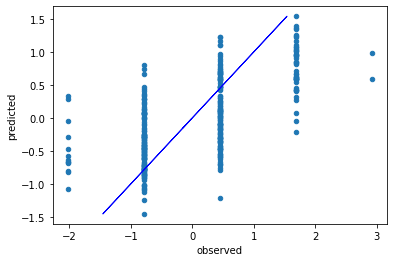

In [183]:
# plot observed vs predicted values
plt.figure()
df2.plot.scatter(x='observed', y='predicted')
plt.plot(Y_pred, Y_pred, color='blue', linewidth=1)
plt.show()

<Figure size 432x288 with 0 Axes>

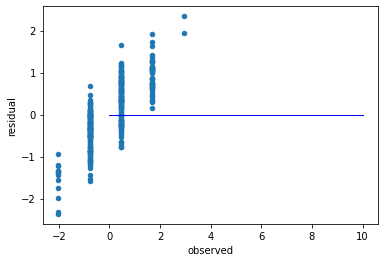

In [184]:
# plot residuals
plt.figure()
df2.plot.scatter(x='observed', y='residual')
plt.plot([0,10], [0,0], color='blue', linewidth=1)
plt.show()

### Conclusions

The equation for predicting the quality of the red wine built by the Linear Regression (the equation is built on normalized values of attributes):
> <strong>y = 0.018 * fixed acidity-0.247 * volatile acidity-0.057 * citric acid + 0.007 * residual sugar-0.087 * chlorides + 0.045 * free sulfur dioxide-0.12 * total sulfur dioxide-0.022 * density-0.114 * pH + 0.19 * sulphates + 0.38 * alcohol- -0.013</strong>

Mean square error while evaluating the model on the test dataset:  0.572.

The 5 most useful attributes for estimating the quality according to the linear regression equation are:
* alcohol
> 0.38 
* volatile acidity
> -0.247 
* sulphates
> 0.19 
* total sulfur dioxide
> 0.12 
* pH
> -0.114 

We have analized the same dataset using a decision tree on another course. In the decision tree the most important attributes were alcohol, acidity, total sulfur dioxide and sulphates. So the results of this linear regression model are in line with the decision tree built on the same data. 